# Desafio Final Bootcamp Data Science

## Orientações Desafio

### Objetivo
 Analisar o consumo de energia elétrica no Brasil ao longo dos anos.

 1. Entender as tendências de consumo de energia no país: identificar como o consumo de energia evoluiu ao longo do tempo e quais fatores influenciam essas mudanças.
 2. Identificar padrões regionais e temporais: analisar como o consumo varia entre diferentes regiões e ao longo dos meses e anos.
 3. Avaliar o impacto de políticas públicas e eventos econômicos: compreender como decisões governamentais e acontecimentos econômicos afetam o setor elétrico.


### Metadados do desafio

![alt text](image.png)

### Atividades (Introdução)
Para essa atividade, os alunos deverão realizar análise de dados utilizando as bibliotecas abordadas no curso.
1. Criar uma virtualenv e instalar as bibliotecas necessárias.
2. Coletar os dados dos arquivos disponíveis em:
      1. https://www.leandrolessa.com.br/datasets
         1. Consumo de Energia Elétrica;
         2. Estado Região.
3. Analisar os dados coletados.
4. Avaliar a necessidade de tratamentos de dados ausentes.
5. Realize a integração das bases de dados utilizando o operador “inner join”
6. Manipulação e visualização dos resultados.

  


  
>**Além da proposta já inclusa no desafio, também será incluso uma base de dados do ibge sobre IPCA, que segundo o IPEADATA o IPCA (Índice Nacional de Preços ao Consumidor Amplo) é um número índice que mede a variação de preços de uma cesta de produtos e serviços consumidos por famílias com renda de 1 a 40 salários mínimos. Ele é o principal indicador de inflação do Brasil, calculado mensalmente pelo IBGE (Instituto Brasileiro de Geografia e Estatística).** O motivo de incluir essa base de inflação no desafio, é testar uma hipótese de correlação sobre consumo de energia e inflação. E para fins didáticos de prática, trazer uma base extra ao que foi fornecido e modela-la para integrar as bases fornecidas.

fonte da base ipca: https://sidra.ibge.gov.br/tabela/3065

# Desenvolvimento

Import para manipulação de funções modularizadas

In [1]:
import sys
sys.path.append('../')

## Importações e Configurações
Segmento destinado para alocação de imports e configurações utilizados no desenvolvimento do desafio

In [2]:
import pandas as pd

#Coleta de dados
import src.data_colect.read_csv as r_csv
import src.data_colect.read_xlsx as r_excel
from src.data_colect.juncao_inner import juncao_inner
from src.data_colect.coluna_mes_ano import coluna_mes_ano, criar_coluna_data

#Análise exploratória
from src.data_analysis.nulos import percent_null, vis_null, exclui_null, identifica_linhas_nulas
from src.data_analysis.duplicated import exclui_duplicados,verfica_duplicados


#Visualizações
from src.data_viz.distribuicao_viz import boxplot_histograma
from src.data_viz.graficos_analiticos import grafico_linha, grafico_linhas_categorias, mapas_consumo_por_estado, plotar_barras_em_subplots, mapa_coropletico_brasil,correlacao


In [3]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

### Coleta de Dados

Espaço destinado para a leitura, coleta de dados e transformação para o formato DataFrame Pandas

In [4]:
# Caminho das bases de dados de consumo  de energia e estados
path_consumo_energia = r'../data/raw/consumo_energia_eletrica/consumo_energia_eletrica.csv'
path_uf = r'../data/raw/estado_regiao/estado_regiao.csv'
path_ipca = r'../data/raw/ipca_inflacao/ipca_2004_2022.xlsx'

#### Dataset consumo de energia

In [5]:
#transformação de dataset raw de consumo de energia em dataframe pandas
df_energia = r_csv.leitura_arquivo_csv(path_consumo_energia, sep =',')

#### Dataset Estados

In [6]:
#transformação de dataset raw de estados em dataframe pandas
df_estados = r_csv.leitura_arquivo_csv(path_uf, sep =';', encoding='latin-1')


#### IPCA

In [7]:
df_ipca = r_excel.leitura_arquivo_xlsx(path_ipca)

***

### Análise Exploratória de Dados Por Dataset

##### Consumo de energia

Análise exploratória dos dados de consumo de energia, para averiguar questões como: </n>
1. Qualidade dos dados:
   - Dados duplicados
   - Dados nulos
   - Tipos de dados
2. Distribuição dos dados:
   -  Visualizações de Distribuição
   -  Outliers

###### Dados Duplicados


In [8]:
# Verificação de dads duplicados do dataset

verfica_duplicados(df_energia)

Existem 1017 duplicados neste dataset


ano  mes sigla_uf tipo_consumo  numero_consumidores  consumo
38880  2023   11       MS       Outros                99710   122350
38881  2023   11       RN       Outros                77359   112767
38882  2023   11       PE       Outros               157848   256509
38883  2023   11       ES       Outros               234985   180315
38884  2023   11       AC       Outros                23068    26323
...     ...  ...      ...          ...                  ...      ...
39892  2023   12       BA  Residencial              5932740   718461
39893  2023   12       PA  Residencial              2614106   478726
39894  2023   12       AC  Residencial               245699    58301
39895  2023   12       RN  Residencial              1390080   210119
39896  2023   12       SC  Residencial              2719791   655389

[1017 rows x 6 columns]

In [9]:
# exclusão de dados duplicados

exclui_duplicados(df_energia)

Exclusão dos dados duplicados, pois eles geralmente são poluição na base e provavelmente, provenientes de algum erro na captura dos dados ou arquitetura da base de dados raw.

###### Dados Nulos

In [10]:
# Verificação de proporção de dados nulos por colunas do dataset

percent_null(df_energia)

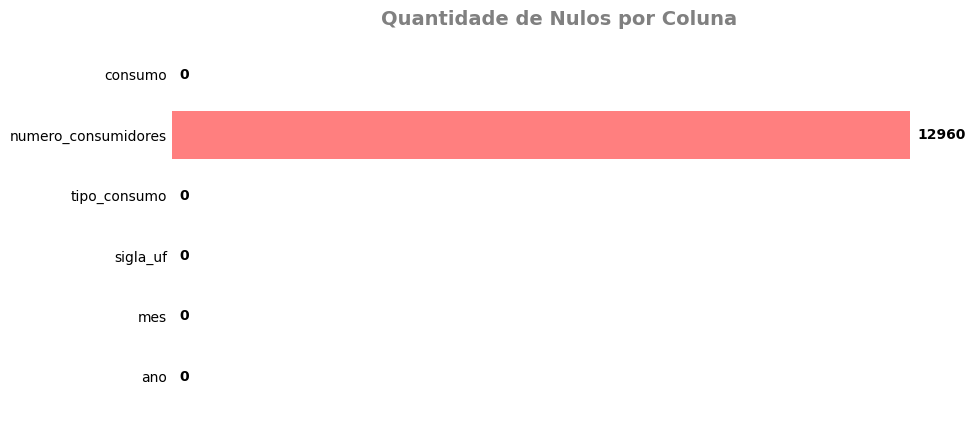

In [11]:
# Visualização dos dados Nulos:
vis_null(df_energia)

In [12]:
exclui_null(df_energia)

A coluna "numero_consumidores" com um alto número de dados nulos, o que pode distorcer bastante a análise, pois ela representa um total de 33% de toda a base.  Como proposta do próprio desafio será feita a exclusão dos dados ausentes, porém um caso real seria interessante um aprofundamento sobre esse problema.  
  
  
![alt text](image-1.png)

###### Descrição e informações sobre os dados

In [13]:
df_energia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25920 entries, 648 to 38879
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ano                  25920 non-null  int64  
 1   mes                  25920 non-null  int64  
 2   sigla_uf             25920 non-null  object 
 3   tipo_consumo         25920 non-null  object 
 4   numero_consumidores  25920 non-null  float64
 5   consumo              25920 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.4+ MB


In [14]:
# Distribuição dos dados núméricos do dataset

df_energia[['numero_consumidores','consumo']].describe()

numero_consumidores  consumo
count                25920    25920
mean                682303   339171
std                1839312   603643
min                     52      354
25%                  18956    61546
50%                 108174   136754
75%                 442412   361652
max               19201264  4849895



****************************************************************************************************
**************************************** numero_consumidores ****************************************
****************************************************************************************************




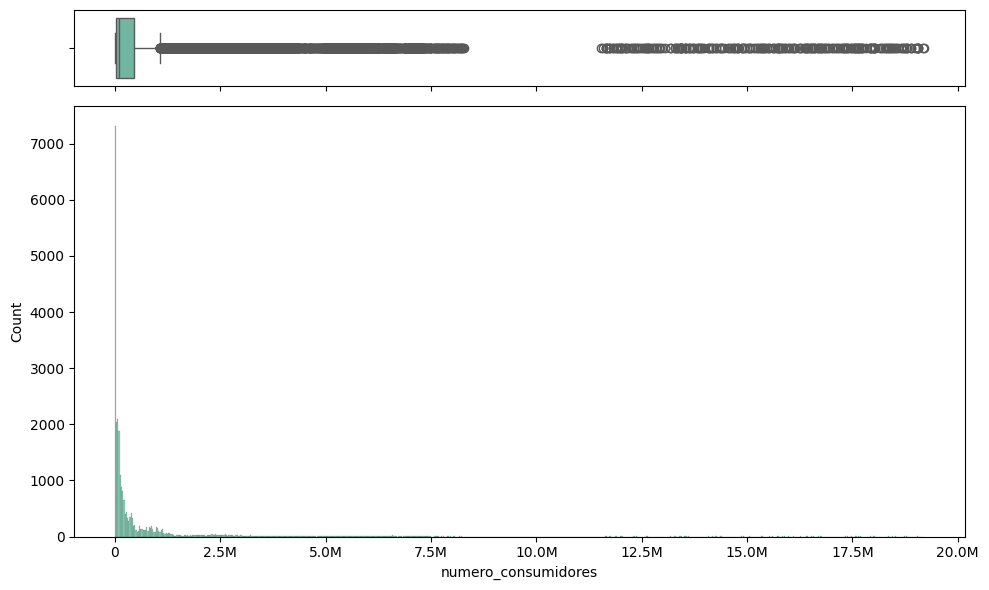



****************************************************************************************************
**************************************** consumo ****************************************
****************************************************************************************************




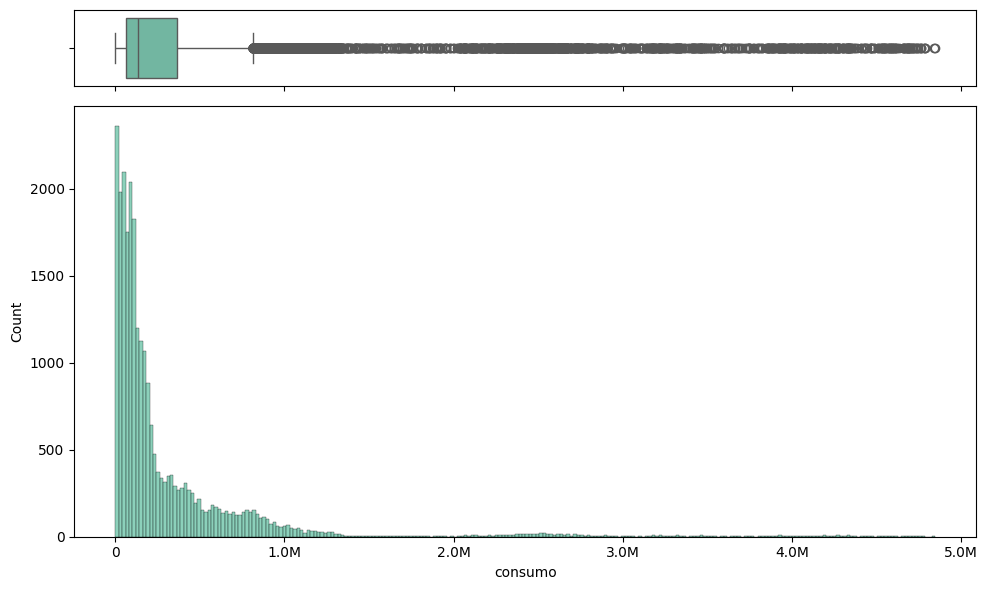

In [15]:
boxplot_histograma(df_energia, ['numero_consumidores','consumo'])


Nessa análise de distribuição, nem a feature de número de consumidores, nem a de consumo, respeitam uma curva normal e possuem muitos outliers. Isso quer dizer que a maior parte do consumo se concentram em algumas faixas específicas, porém há muitos dados que fogem a essa faixa.

##### Estados

Análise exploratória dos dados de estados, para averiguar questões como: </n>
1. Qualidade dos dados:
   - Dados duplicados
   - Dados nulos
   - Tipos de dados
2. Distribuição dos dados:
   -  Visualizações de Distribuição
   -  Outliers

###### Dados Duplicados

In [16]:
# Verificação de dads duplicados do dataset

verfica_duplicados(df_estados)

Existem 0 duplicados neste dataset


Empty DataFrame
Columns: [id_estado, sigla, estado, regiao, pais]
Index: []

###### Dados Nulos

In [17]:
# Verificação de proporção de dados nulos por colunas do dataset

percent_null(df_estados)

Dataset de estados não possui dados duplicados ou nulos

###### Descrição e informações sobre os dados

In [18]:
df_estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_estado  27 non-null     int64 
 1   sigla      27 non-null     object
 2   estado     27 non-null     object
 3   regiao     27 non-null     object
 4   pais       27 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.2+ KB


##### IPCA

###### Dados Duplicados

In [19]:
verfica_duplicados(df_ipca)

Existem 0 duplicados neste dataset


Empty DataFrame
Columns: [Mês, IPCA15 - Número-índice (base: dezembro de 1993 = 100) (Número-índice), IPCA15 - Variação mensal (%), IPCA15 - Variação acumulada em 3 meses (%), IPCA15 - Variação acumulada em 6 meses (%), IPCA15 - Variação acumulada no ano (%)]
Index: []

###### Dados Nulos

In [20]:
percent_null(df_ipca)

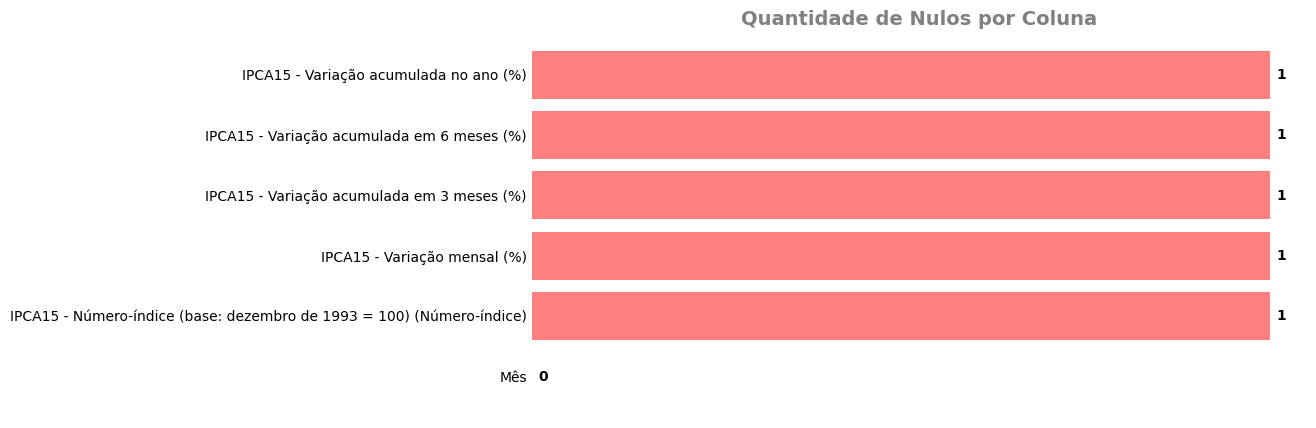

In [21]:
vis_null(df_ipca)

In [22]:
identifica_linhas_nulas(df_ipca)

Mês  \
256  Fonte: IBGE - Índice Nacional de Preços ao Con...   

     IPCA15 - Número-índice (base: dezembro de 1993 = 100) (Número-índice)  \
256                                                NaN                       

     IPCA15 - Variação mensal (%)  IPCA15 - Variação acumulada em 3 meses (%)  \
256                           NaN                                         NaN   

     IPCA15 - Variação acumulada em 6 meses (%)  \
256                                         NaN   

     IPCA15 - Variação acumulada no ano (%)  
256                                     NaN

Motivo dos dados nulos nesta tabela, é que ela tem uma linha mesclada  
  
    
![alt text](image-2.png)

In [23]:
exclui_null(df_ipca)

###### Descrição e informações sobre os dados

In [24]:
df_ipca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 0 to 255
Data columns (total 6 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Mês                                                                    256 non-null    object 
 1   IPCA15 - Número-índice (base: dezembro de 1993 = 100) (Número-índice)  256 non-null    float64
 2   IPCA15 - Variação mensal (%)                                           256 non-null    float64
 3   IPCA15 - Variação acumulada em 3 meses (%)                             256 non-null    float64
 4   IPCA15 - Variação acumulada em 6 meses (%)                             256 non-null    float64
 5   IPCA15 - Variação acumulada no ano (%)                                 256 non-null    float64
dtypes: float64(5), object(1)
memory usage: 14.0+ KB


In [25]:
df_ipca.describe()

IPCA15 - Número-índice (base: dezembro de 1993 = 100) (Número-índice)  \
count                                                256                       
mean                                                4188                       
std                                                 1433                       
min                                                 2201                       
25%                                                 2893                       
50%                                                 3900                       
75%                                                 5212                       
max                                                 7128                       

       IPCA15 - Variação mensal (%)  \
count                           256   
mean                              0   
std                               0   
min                              -1   
25%                               0   
50%                               0   
75%                               1   
max                               2   

       IPCA15 - Variação acumulada em 3 meses (%)  \
count                                         256   
mean                                            1   
std                                             1   
min                                            -1   
25%                                             1   
50%                                             1   
75%                                             2   
max                                             4   

       IPCA15 - Variação acumulada em 6 meses (%)  \
count                                         256   
mean                                            3   
std                                             1   
min                                            -0   
25%                                             2   
50%                                             3   
75%                                             4   
max                                             6   

       IPCA15 - Variação acumulada no ano (%)  
count                                     256  
mean                                        3  
std                                         2  
min                                         0  
25%                                         2  
50%                                         3  
75%                                         4  
max                                        11

In [26]:
colunas_ipca_numericas = ['IPCA15 - Número-índice (base: dezembro de 1993 = 100) (Número-índice)',
                          'IPCA15 - Variação mensal (%)',
                          'IPCA15 - Variação acumulada em 3 meses (%)',
                          'IPCA15 - Variação acumulada em 6 meses (%)',
                          'IPCA15 - Variação acumulada no ano (%)']



****************************************************************************************************
**************************************** IPCA15 - Número-índice (base: dezembro de 1993 = 100) (Número-índice) ****************************************
****************************************************************************************************




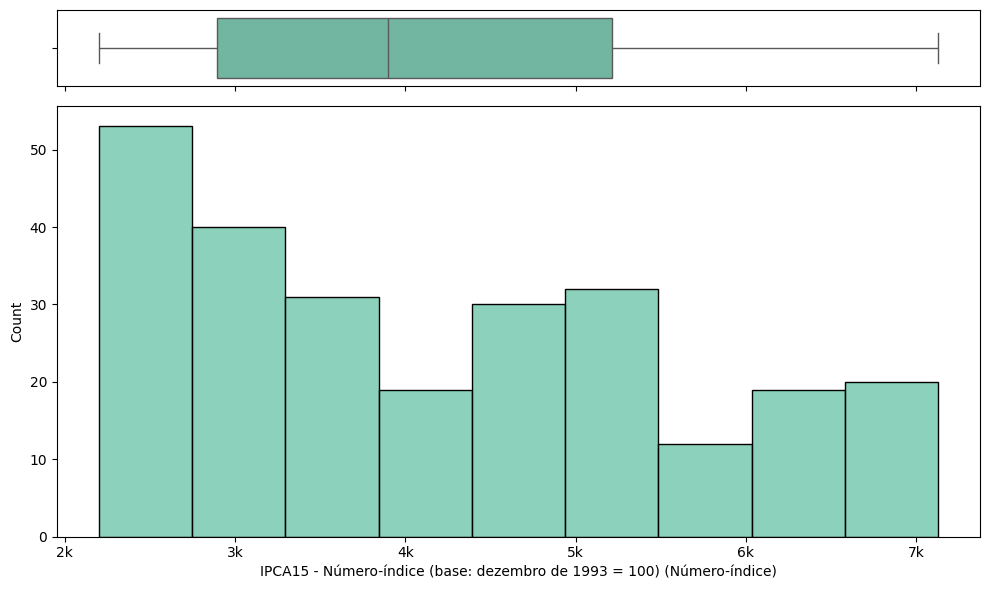



****************************************************************************************************
**************************************** IPCA15 - Variação mensal (%) ****************************************
****************************************************************************************************




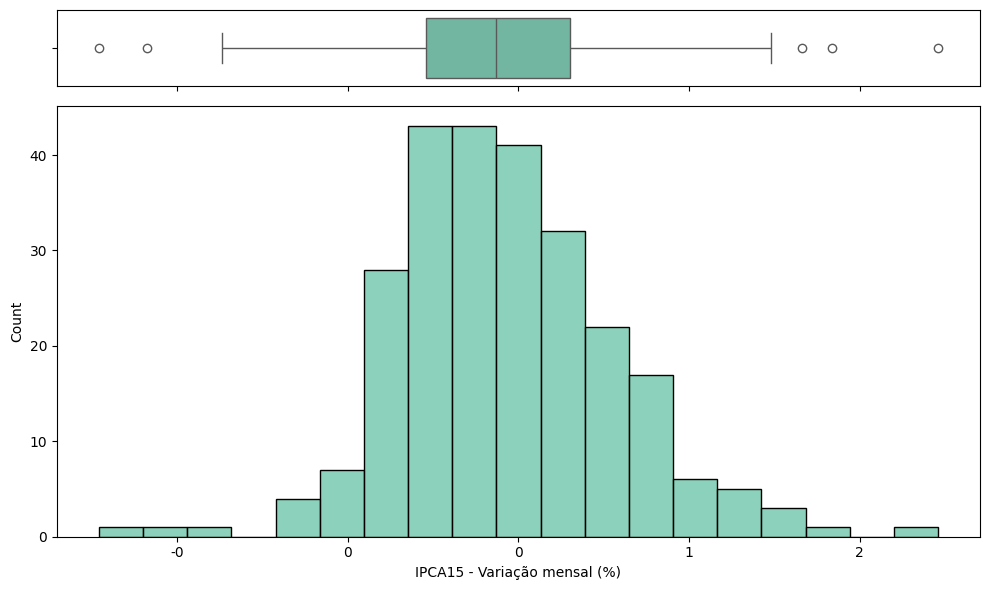



****************************************************************************************************
**************************************** IPCA15 - Variação acumulada em 3 meses (%) ****************************************
****************************************************************************************************




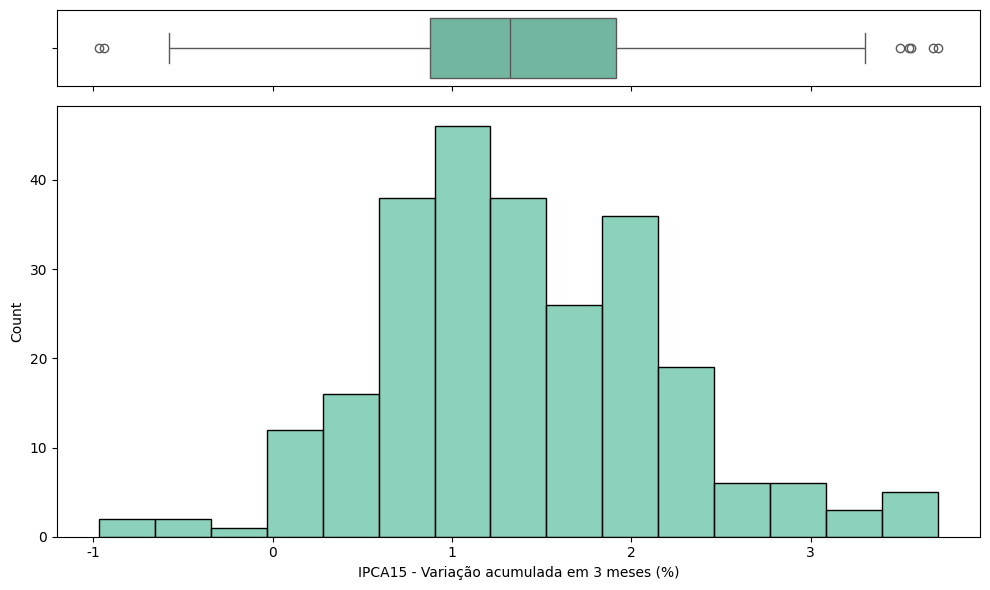



****************************************************************************************************
**************************************** IPCA15 - Variação acumulada em 6 meses (%) ****************************************
****************************************************************************************************




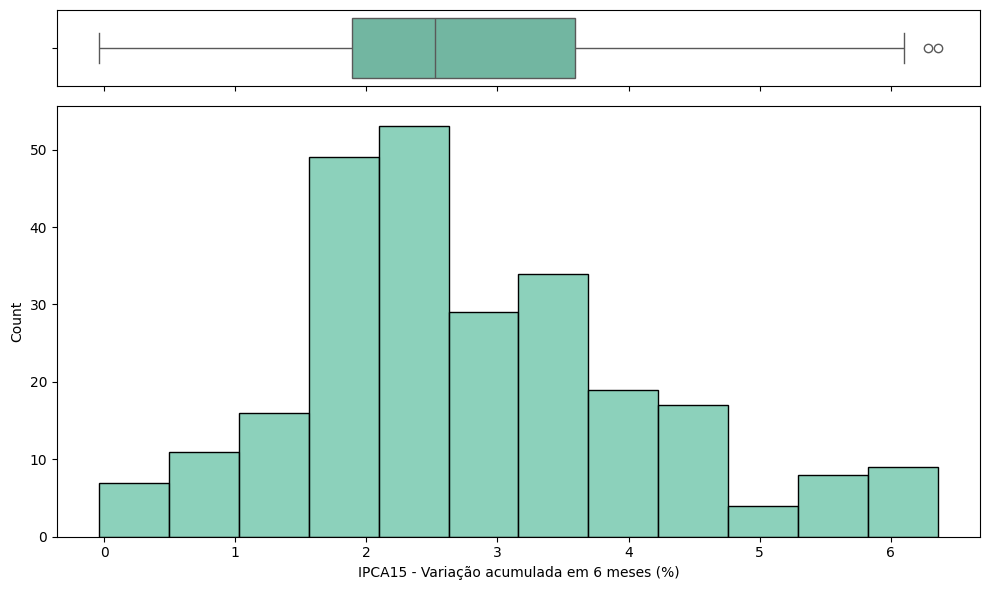



****************************************************************************************************
**************************************** IPCA15 - Variação acumulada no ano (%) ****************************************
****************************************************************************************************




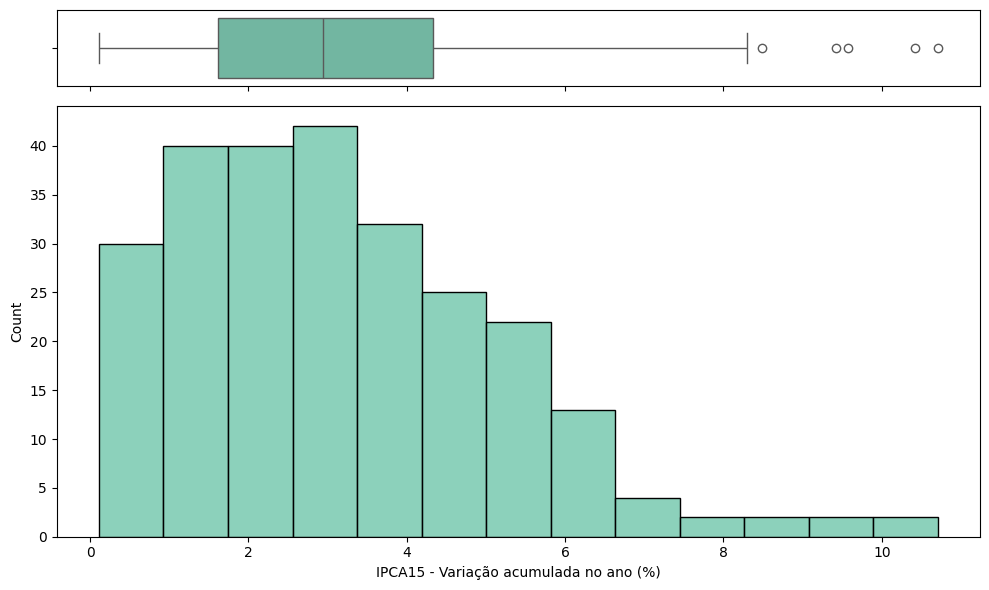

In [27]:
boxplot_histograma(df_ipca,colunas_ipca_numericas)

Quando olhamos para variação mensal e para a variação trimestral, percebe-se que o valor a distribuição se aproximam de uma normal e com poucos outliers, inclusive com o início da faixa de distribuição em números negativos, indicando que existem momentos em que ocorre uma leve queda na inflação, quando olhado por esse horizonte (mensal, trimestral). Porém quando olhamos por semestre ou por ano isso não acontece, ou seja, essas pequenas oscilações negativas mensais e trimestrais, não são o suficiente para o impacto quando olhadas semestralmente ou anualmente.

### Descritivo dos dados

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### Junção dos datasets

In [29]:
# Junção de datasets energia e estados

df_consolidado = juncao_inner(df_energia , df_estados,'sigla_uf','sigla', ['regiao','estado'])


##### Tratamento de colunas para junção de tabelas

In [30]:
coluna_mes_ano(df_ipca,'Mês')

IPCA15 - Número-índice (base: dezembro de 1993 = 100) (Número-índice)  \
0                                               2201                       
1                                               2221                       
2                                               2230                       
3                                               2234                       
4                                               2246                       

   IPCA15 - Variação mensal (%)  IPCA15 - Variação acumulada em 3 meses (%)  \
0                             1                                           1   
1                             1                                           2   
2                             0                                           2   
3                             0                                           2   
4                             1                                           1   

   IPCA15 - Variação acumulada em 6 meses (%)  \
0                                           3   
1                                           3   
2                                           3   
3                                           3   
4                                           3   

   IPCA15 - Variação acumulada no ano (%)   nome_mes   ano  mes  
0                                       1    janeiro  2004    1  
1                                       2  fevereiro  2004    2  
2                                       2      março  2004    3  
3                                       2      abril  2004    4  
4                                       3       maio  2004    5

Renomeando colunas para melhorar legibilidade das colunas

In [31]:

df_ipca.rename(columns={
    'IPCA15 - Número-índice (base: dezembro de 1993 = 100) (Número-índice)': 'ipca15_indice',
    'IPCA15 - Variação mensal (%)'                                         : 'ipca15_var_mensal',
    'IPCA15 - Variação acumulada em 3 meses (%)'                           : 'ipca15_var_3m',
    'IPCA15 - Variação acumulada em 6 meses (%)'                           : 'ipca15_var_6m',
    'IPCA15 - Variação acumulada no ano (%)'                               : 'ipca15_var_ano'
}, inplace=True)

Criando colunas para fazer junção

In [32]:
criar_coluna_data(df_ipca, coluna_ano='ano', coluna_mes='mes', nova_coluna='ano_mes')
criar_coluna_data(df_consolidado, coluna_ano='ano', coluna_mes='mes', nova_coluna='ano_mes')

ano  mes sigla_uf tipo_consumo  numero_consumidores  consumo  \
0      2004    1       RN       Outros                40857    69617   
1      2004    1       SP       Outros               311650   937538   
2      2004    1       MS       Outros                56881    67601   
3      2004    1       SC       Outros               226165   209380   
4      2004    1       RJ       Outros                70634   416128   
...     ...  ...      ...          ...                  ...      ...   
25915  2023   12       BA  Residencial              5932740   718461   
25916  2023   12       PA  Residencial              2614106   478726   
25917  2023   12       AC  Residencial               245699    58301   
25918  2023   12       RN  Residencial              1390080   210119   
25919  2023   12       SC  Residencial              2719791   655389   

             regiao               estado  ano_mes  
0          Nordeste  Rio Grande do Norte  2004-01  
1           Sudeste            São Paulo  2004-01  
2      Centro-Oeste   Mato Grosso do Sul  2004-01  
3               Sul       Santa Catarina  2004-01  
4           Sudeste       Rio de Janeiro  2004-01  
...             ...                  ...      ...  
25915      Nordeste                Bahia  2023-12  
25916         Norte                 Pará  2023-12  
25917         Norte                 Acre  2023-12  
25918      Nordeste  Rio Grande do Norte  2023-12  
25919           Sul       Santa Catarina  2023-12  

[25920 rows x 9 columns]

Junção entre todas as tabelas

In [33]:
df_consolidado = juncao_inner(df_consolidado , df_ipca,'ano_mes','ano_mes', ['ipca15_indice','ipca15_var_mensal','ipca15_var_3m','ipca15_var_6m','ipca15_var_ano'])

***

### Análises

##### Consumo por Região

In [34]:
dados_consumo = (df_consolidado.groupby('regiao')
                 .agg(soma=('consumo', 'sum'), media=('consumo', 'mean'), desvio=('consumo', 'std'))
                 .reset_index()
                 .set_index('regiao'))

g:\Meu Drive\Pós XP\bootcamp cientista de dados\Desafio final\notebook\..\src\data_viz\graficos_analiticos.py:154: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(dados_ordenados.index, rotation=45, ha='right')
g:\Meu Drive\Pós XP\bootcamp cientista de dados\Desafio final\notebook\..\src\data_viz\graficos_analiticos.py:154: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(dados_ordenados.index, rotation=45, ha='right')
g:\Meu Drive\Pós XP\bootcamp cientista de dados\Desafio final\notebook\..\src\data_viz\graficos_analiticos.py:154: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(dados_ordenados.index, rotation=45, ha='right')


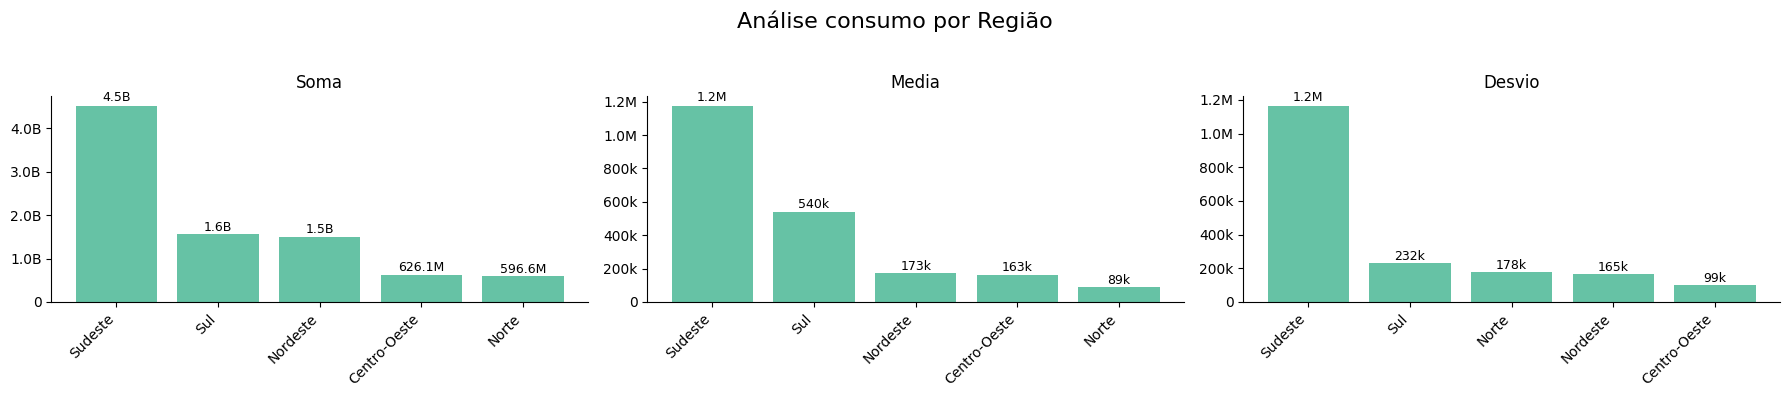

In [35]:
plotar_barras_em_subplots(dados_consumo,ncols=3, titulo='Análise consumo por Região')

A região que mais consumiu noo período disponibilizado é região sudeste, entretanto isso é algo que pode ser enviesado por conta do número de consumidores que dessas regiões, que é algo que será visto mais adiante.

##### Consumo por Estado

In [36]:
df_metrica = df_consolidado.groupby('estado')['consumo'].agg(
    consumo_total='sum',
    consumo_medio='mean',
    consumo_std='std'
).reset_index()

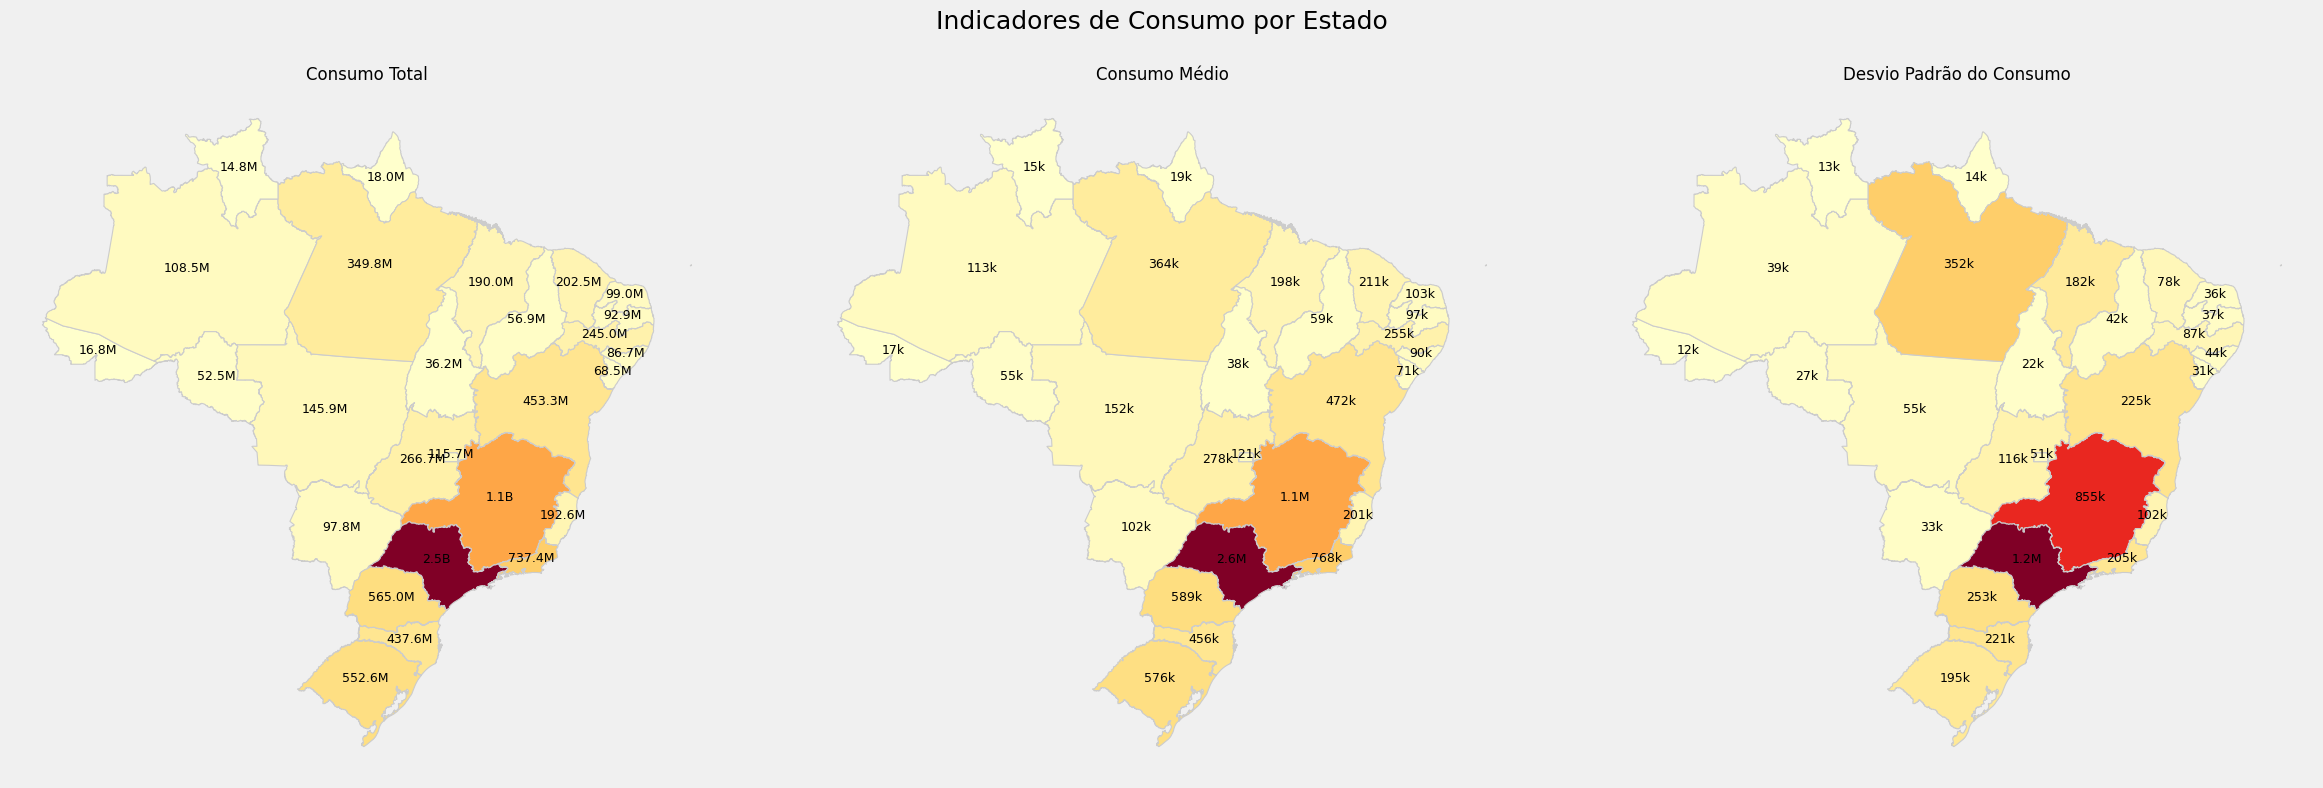

In [37]:
mapas_consumo_por_estado(df_metrica, "Indicadores de Consumo por Estado")

<p>Quando se aprofunda no estudo de consumo a nível estado, é possível ver que os estados que mais consomem são SP e MG eles também são os que possuem maior desvio padrão, ou seja eles são os estados menos estáveis em relação ao consumo, isso pode se dar tanto pela questão já mensionda de número de consumidores, ou por conterem mais outliers.</p>  
  
  
  
Outro estado interessante de se notar sob a ótica do desvio padrão é o PA, que também acabou se destacando como um estado menos estável em relação a média de consumo.

##### Consumo por Ano

In [38]:
dados_consumo = (df_consolidado.groupby('ano')
                 .agg(soma=('consumo', 'sum'), media=('consumo', 'mean'), desvio=('consumo', 'std'))
                 .reset_index()
                 .set_index('ano'))

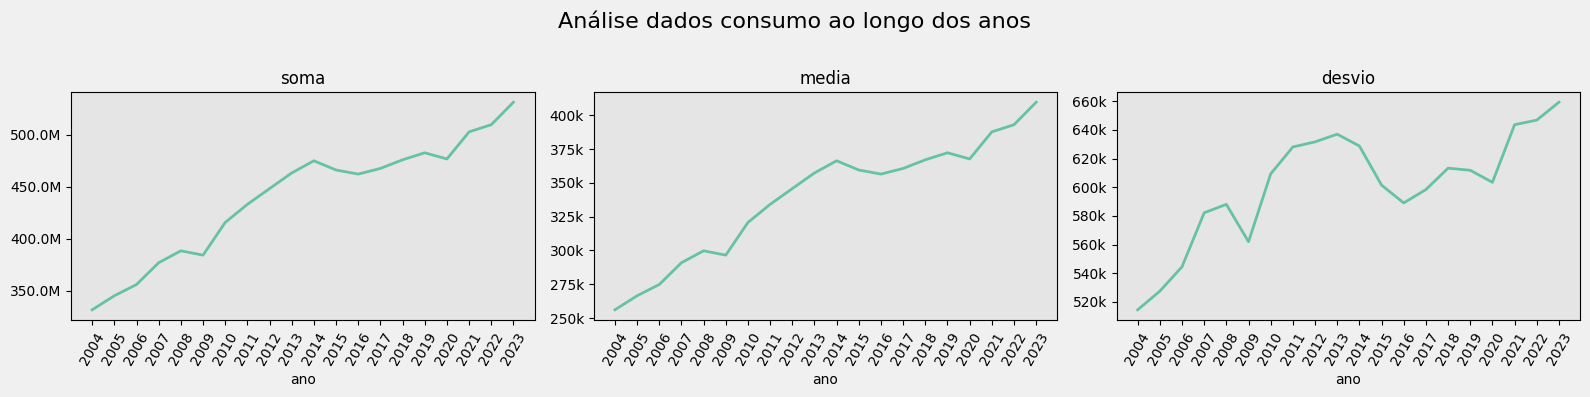

In [39]:
grafico_linha(dataframe=dados_consumo, titulo ='Análise dados consumo ao longo dos anos', numero_linhas_plot= 1,numero_colunas_plot=3)

Quando olhamos para o consumo ao longo dos anos, é claro ver uma tendência de alta, com a métrica de desvio padrão é possível notar que o período mais instável foi de 2007 a 2014.
Em 2008 tivemos uma crise global e em 2014 uma crise hídrica em São Paulo e uma crise econômicia no país. Não é uma afirmação, mas são pontos que seriam interessantes para aprofundamento, para analisar se essas crises colaboram para o consumo ou o cosumo de alguma forma pode ter colaborado para a crise, especialmente a hídrica, levando em conta que a maioria das fontes de energia do país são provenientes de usinas hidroelétricas.

##### Consumo por tipo de Consumo

In [40]:
df_tp_consumo = df_consolidado.groupby(['ano', 'tipo_consumo'])['consumo'].mean().reset_index()

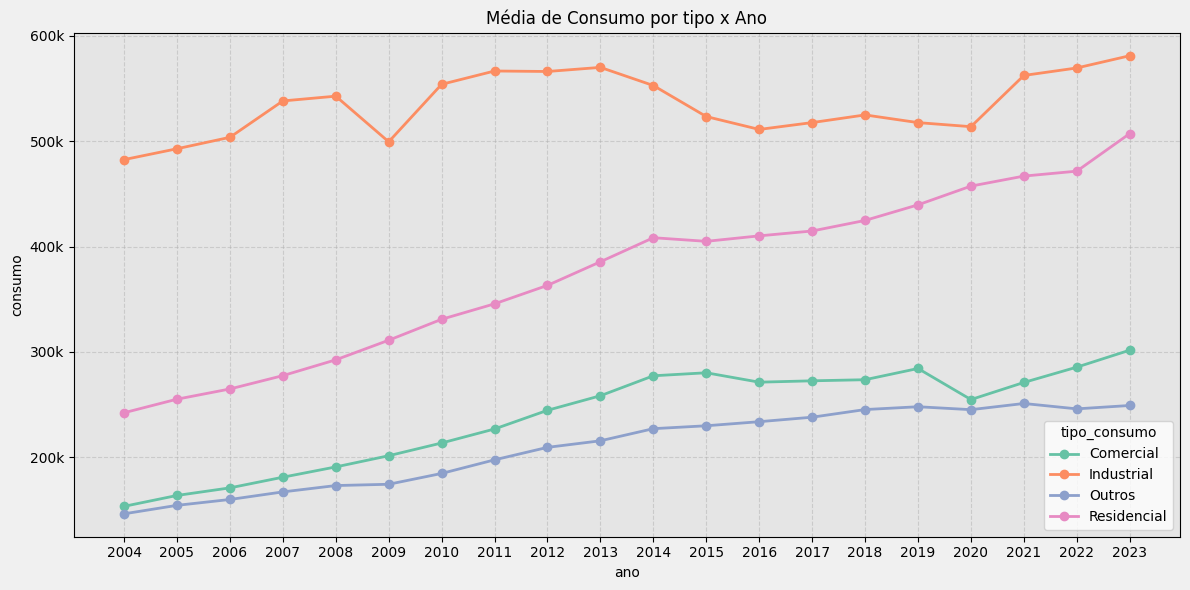

In [41]:
grafico_linhas_categorias(df_tp_consumo, 'ano', 'tipo_consumo', 'consumo', 'Média de Consumo por tipo x Ano')

Fica evidente a partir desse gráfico, que a categoria que mais tem contribuído para o aumento do consumo de energia, é a categoria Residencial, que tem um crescimento muito maior comparado aos outros, chegando a se aproximar da categoria Industrial(categoria com maior consumo), isso de certa forma complementa a análise de consumo por estados, onde estados com maior número de consumidores, ou seja, mais populosos, tendem a consumir mais. Para tentar confirmar isso, vamos analisar o número de consumidores ao longo do tempo por categoria

In [42]:
df_tp_consumo = df_consolidado.groupby(['ano', 'tipo_consumo'])['numero_consumidores'].mean().reset_index()

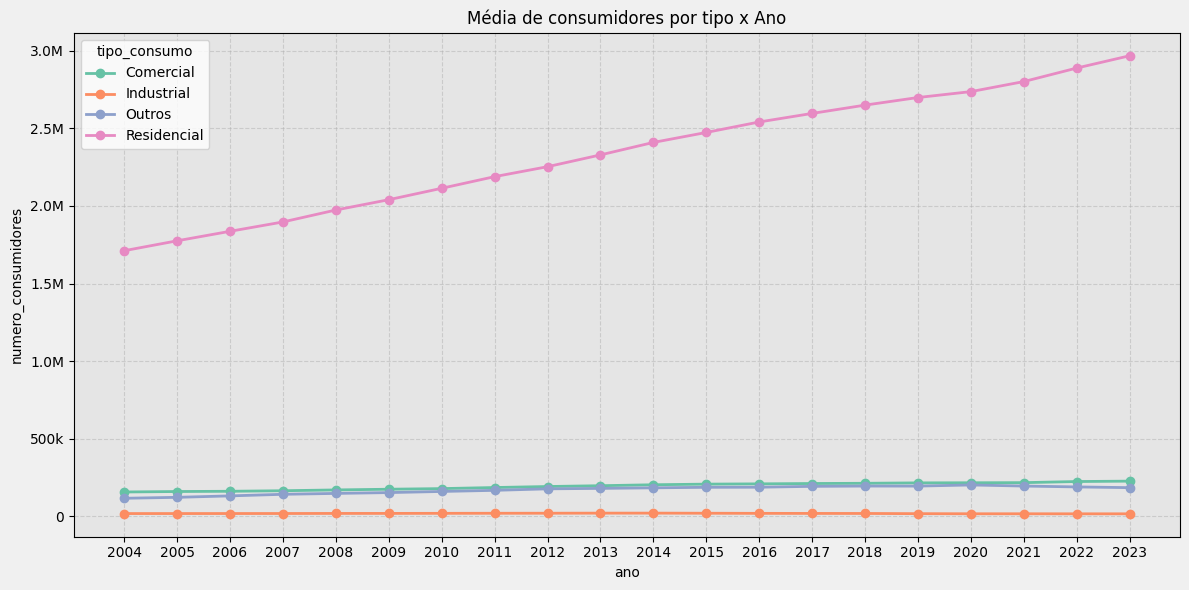

In [43]:
grafico_linhas_categorias(df_tp_consumo, 'ano', 'tipo_consumo', 'numero_consumidores', 'Média de consumidores por tipo x Ano')

Como previsto, o número de consumidores residenciais tem aumentado ao longo dos anos, ao passo que as outras categorias se mantém estáveis, ou seja o maior contribuinte para o aumento de consumo de energia, realmente são os consumidores residenciais.

##### Proporção de Consumidores por Consumo por Região

In [44]:
#filtro para analisar somento os dados da categoria residencial
filtro = df_consolidado[df_consolidado['tipo_consumo']=='Residencial']

In [45]:
dados_consumo = (filtro.groupby('regiao')
                 .agg(soma_consumo=('consumo', 'sum'), soma_consumidores=('numero_consumidores', 'sum'))
                 .reset_index()
                 .set_index('regiao'))

dados_consumo['proporcao'] = round(dados_consumo['soma_consumo']/dados_consumo['soma_consumidores']*100,2)
dados_consumo

soma_consumo  soma_consumidores  proporcao
regiao                                                  
Centro-Oeste     200425474         1128879056         18
Nordeste         462958053         3975900730         12
Norte            154155020          895515339         17
Sudeste         1214624659         7022424250         17
Sul              389160217         2162816808         18

g:\Meu Drive\Pós XP\bootcamp cientista de dados\Desafio final\notebook\..\src\data_viz\graficos_analiticos.py:154: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(dados_ordenados.index, rotation=45, ha='right')


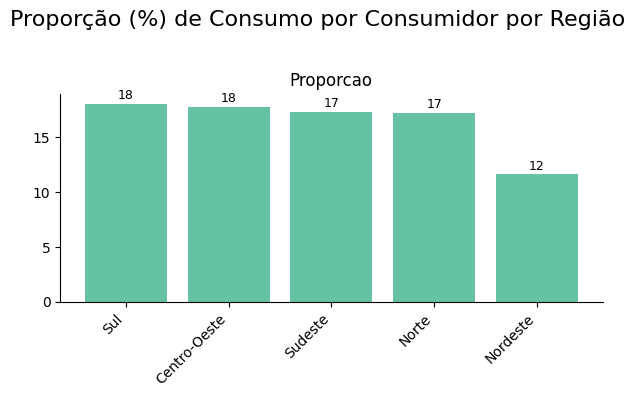

In [46]:
plotar_barras_em_subplots(df = dados_consumo[['proporcao']], ncols=1, titulo= r'Proporção (%) de Consumo por Consumidor por Região')

A Região que proporcionalmente ao número de consumidores, mais consome é a região Sul, mas sem grandes diferenças para as outras regiões, com exceção do nordeste. Para este caso também poderia ser um novo ponto de estudo, pois nessa questão regional, podemos ter clima e infraestrutura, como fatores de influência de consumo.

##### Proporção de Consumidores por Consumo  por Estado

In [47]:
dados_consumo = (filtro.groupby('estado')
                 .agg(soma_consumo=('consumo', 'sum'), soma_consumidores=('numero_consumidores', 'sum'))
                 .reset_index()
                 .set_index('estado'))

dados_consumo['proporcao'] = round(dados_consumo['soma_consumo']/dados_consumo['soma_consumidores']*100,2)
dados_consumo

soma_consumo  soma_consumidores  proporcao
estado                                                         
Acre                      7728353           42270581         18
Alagoas                  23593798          214486638         11
Amapá                     9211459           36832199         25
Amazonas                 33872512          168266433         20
Bahia                   117269154         1106714880         11
Ceará                    72440603          605572831         12
Distrito Federal         41469112          196152564         21
Espírito Santo           43330023          269913149         16
Goiás                    81124307          524624558         15
Maranhão                 51161497          432694076         12
Mato Grosso              45782026          222212724         21
Mato Grosso do Sul       32050029          185889210         17
Minas Gerais            197796518         1583960038         12
Paraná                  134797348          817169785         16
Paraíba                  31906949          283089054         11
Pará                     60312195          430843212         14
Pernambuco               85716828          687506754         12
Piauí                    26636292          222560174         12
Rio Grande do Norte      35092979          255734192         14
Rio Grande do Sul       153081626          849940469         18
Rio de Janeiro          247010582         1476435221         17
Rondônia                 20696657           94488367         22
Roraima                   7550033           26352088         29
Santa Catarina          101281243          495706554         20
Sergipe                  19139953          167542131         11
São Paulo               726487536         3692115842         20
Tocantins                14783811           96462459         15

g:\Meu Drive\Pós XP\bootcamp cientista de dados\Desafio final\notebook\..\src\data_viz\graficos_analiticos.py:154: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(dados_ordenados.index, rotation=45, ha='right')


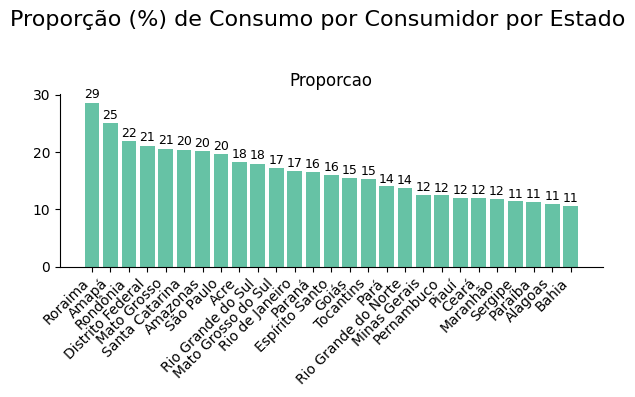

In [48]:
plotar_barras_em_subplots(df = dados_consumo[['proporcao']], ncols=1, titulo= r'Proporção (%) de Consumo por Consumidor por Estado')

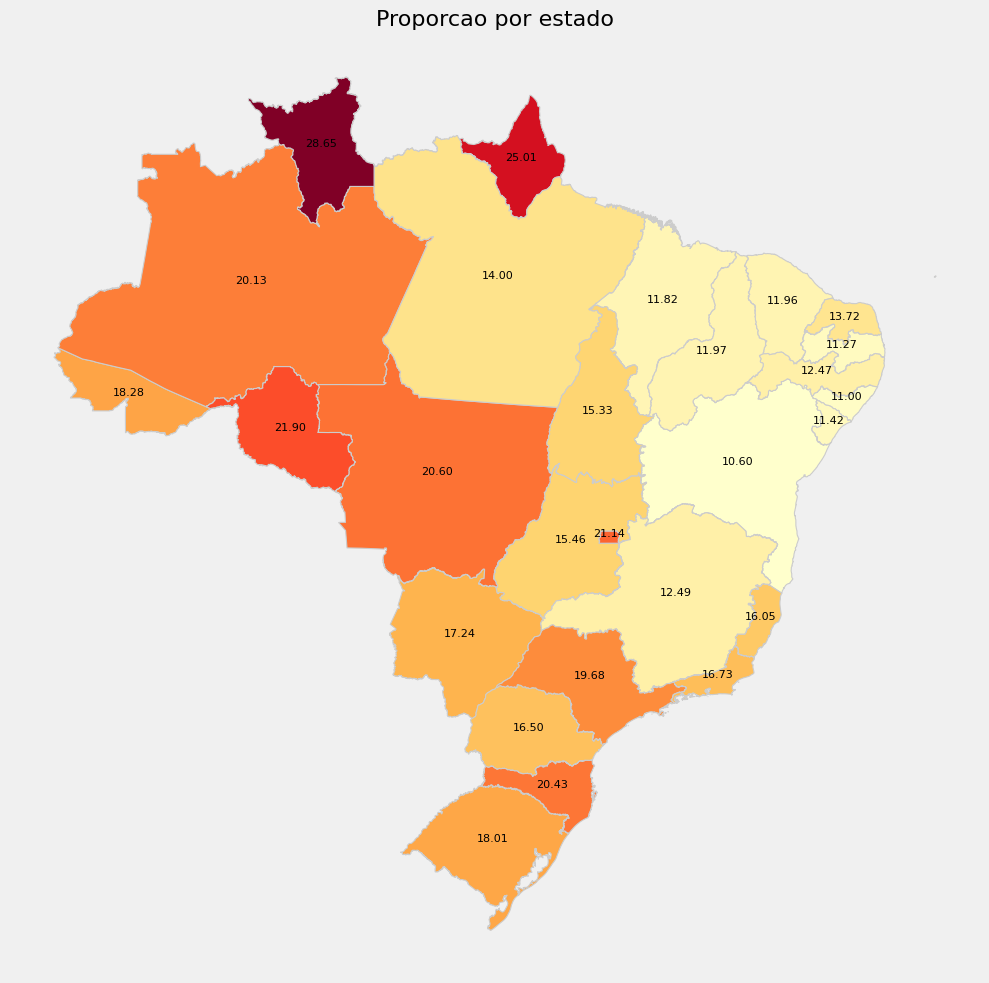

In [49]:
mapa_coropletico_brasil(dados_consumo, 'proporcao', 'Proporcao por estado', legenda=False)

Proporcionalmente aos números de consumidores, o estados que mais consome é Roraima, também poderia ser um ponto de estudo, para saber o que influencia esse consumo maior em relação aos outros estados.

##### Sazonalidade Mês

In [50]:
dados_consumo = (filtro.groupby('ano_mes')
                 .agg(media_consumo=('consumo', 'mean'), soma_consumidores=('numero_consumidores', 'sum'))
                 .reset_index()
                 .set_index('ano_mes'))

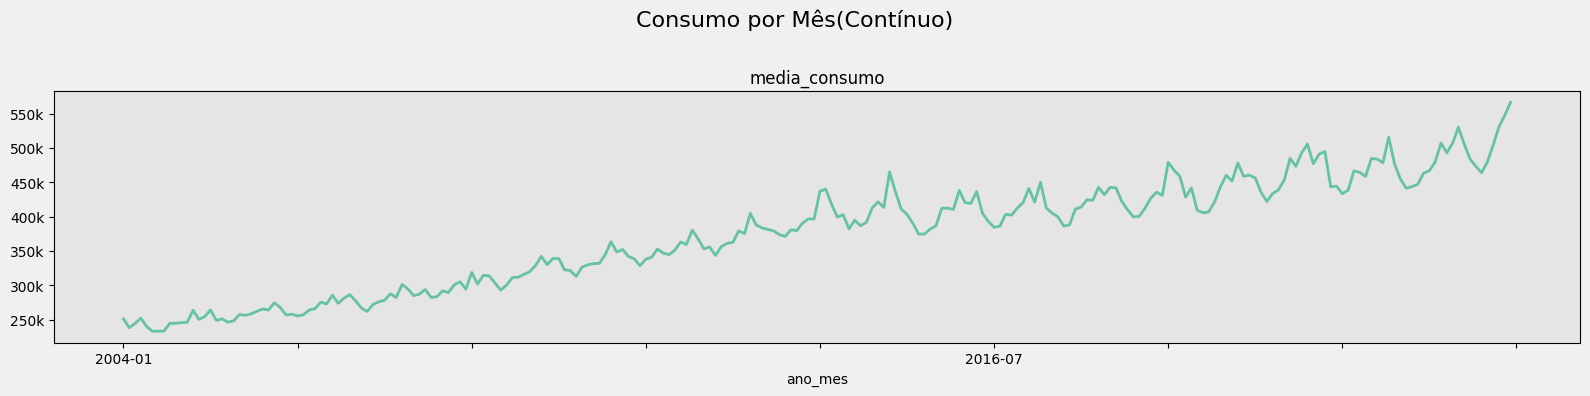

In [51]:
grafico_linha(dados_consumo,'Consumo por Mês(Contínuo)',numero_colunas_plot=1,numero_linhas_plot=1)

Esses picos ao longo do tempo, são indícios de sazonalidade, por isso vale análisar os mêses de maneira discreta para ver se de alguma forma existem alguns meses em que a média de consumo é maior que em outros

In [52]:
dados_consumo = (filtro.groupby('mes')
                 .agg(media_consumo=('consumo', 'mean'), soma_consumidores=('numero_consumidores', 'sum'))
                 .reset_index()
                 .set_index('mes'))


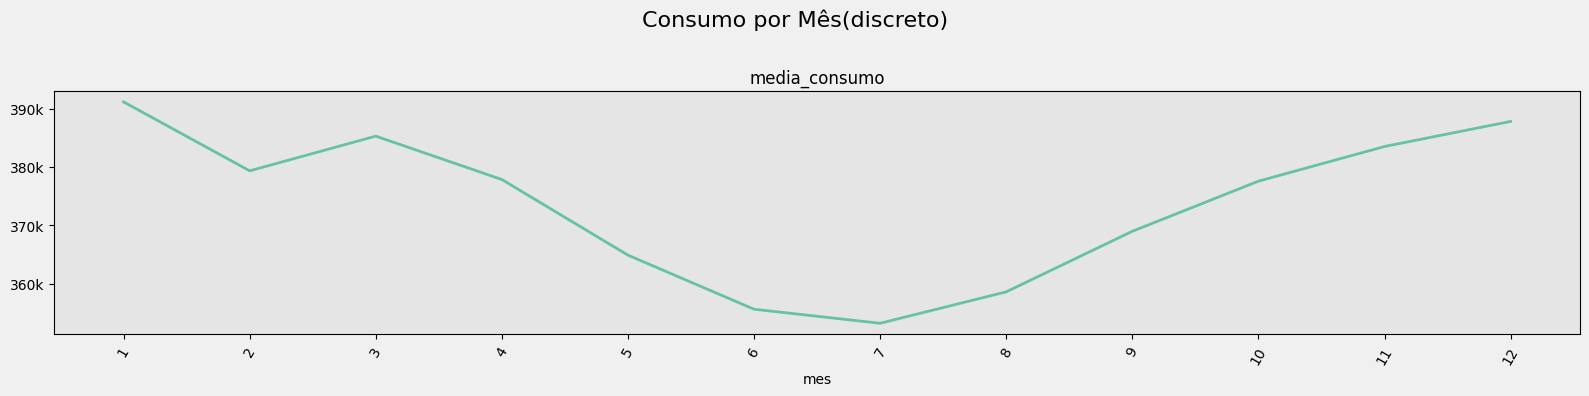

In [53]:
grafico_linha(dados_consumo,'Consumo por Mês(discreto)',numero_colunas_plot=1,numero_linhas_plot=1)

Meses de outubro a dezembro e de janeiro a abril, o consumo de enegia se mostram mais elevados em média, se fossemos direcionar ações para redução de consumo, certamente seriam nesses meses. Pensando em como são as estações do ano no Brasil, esses meses coincidem com as estações de primavera e verão no emisfério sul, que são estações mais quentes e que podem acarretar em um aumento de uso de ar condicionado, por exemplo, eltrodoméstico que consome muita energia.

##### Comparação de Consumo e IPCA

Antes de fazer um aprofundamento sobre inflação e consumo, vamos analisar todas as variáveis numéricas e ver como elas se comportam, para tentar extrair alguma outra análise.

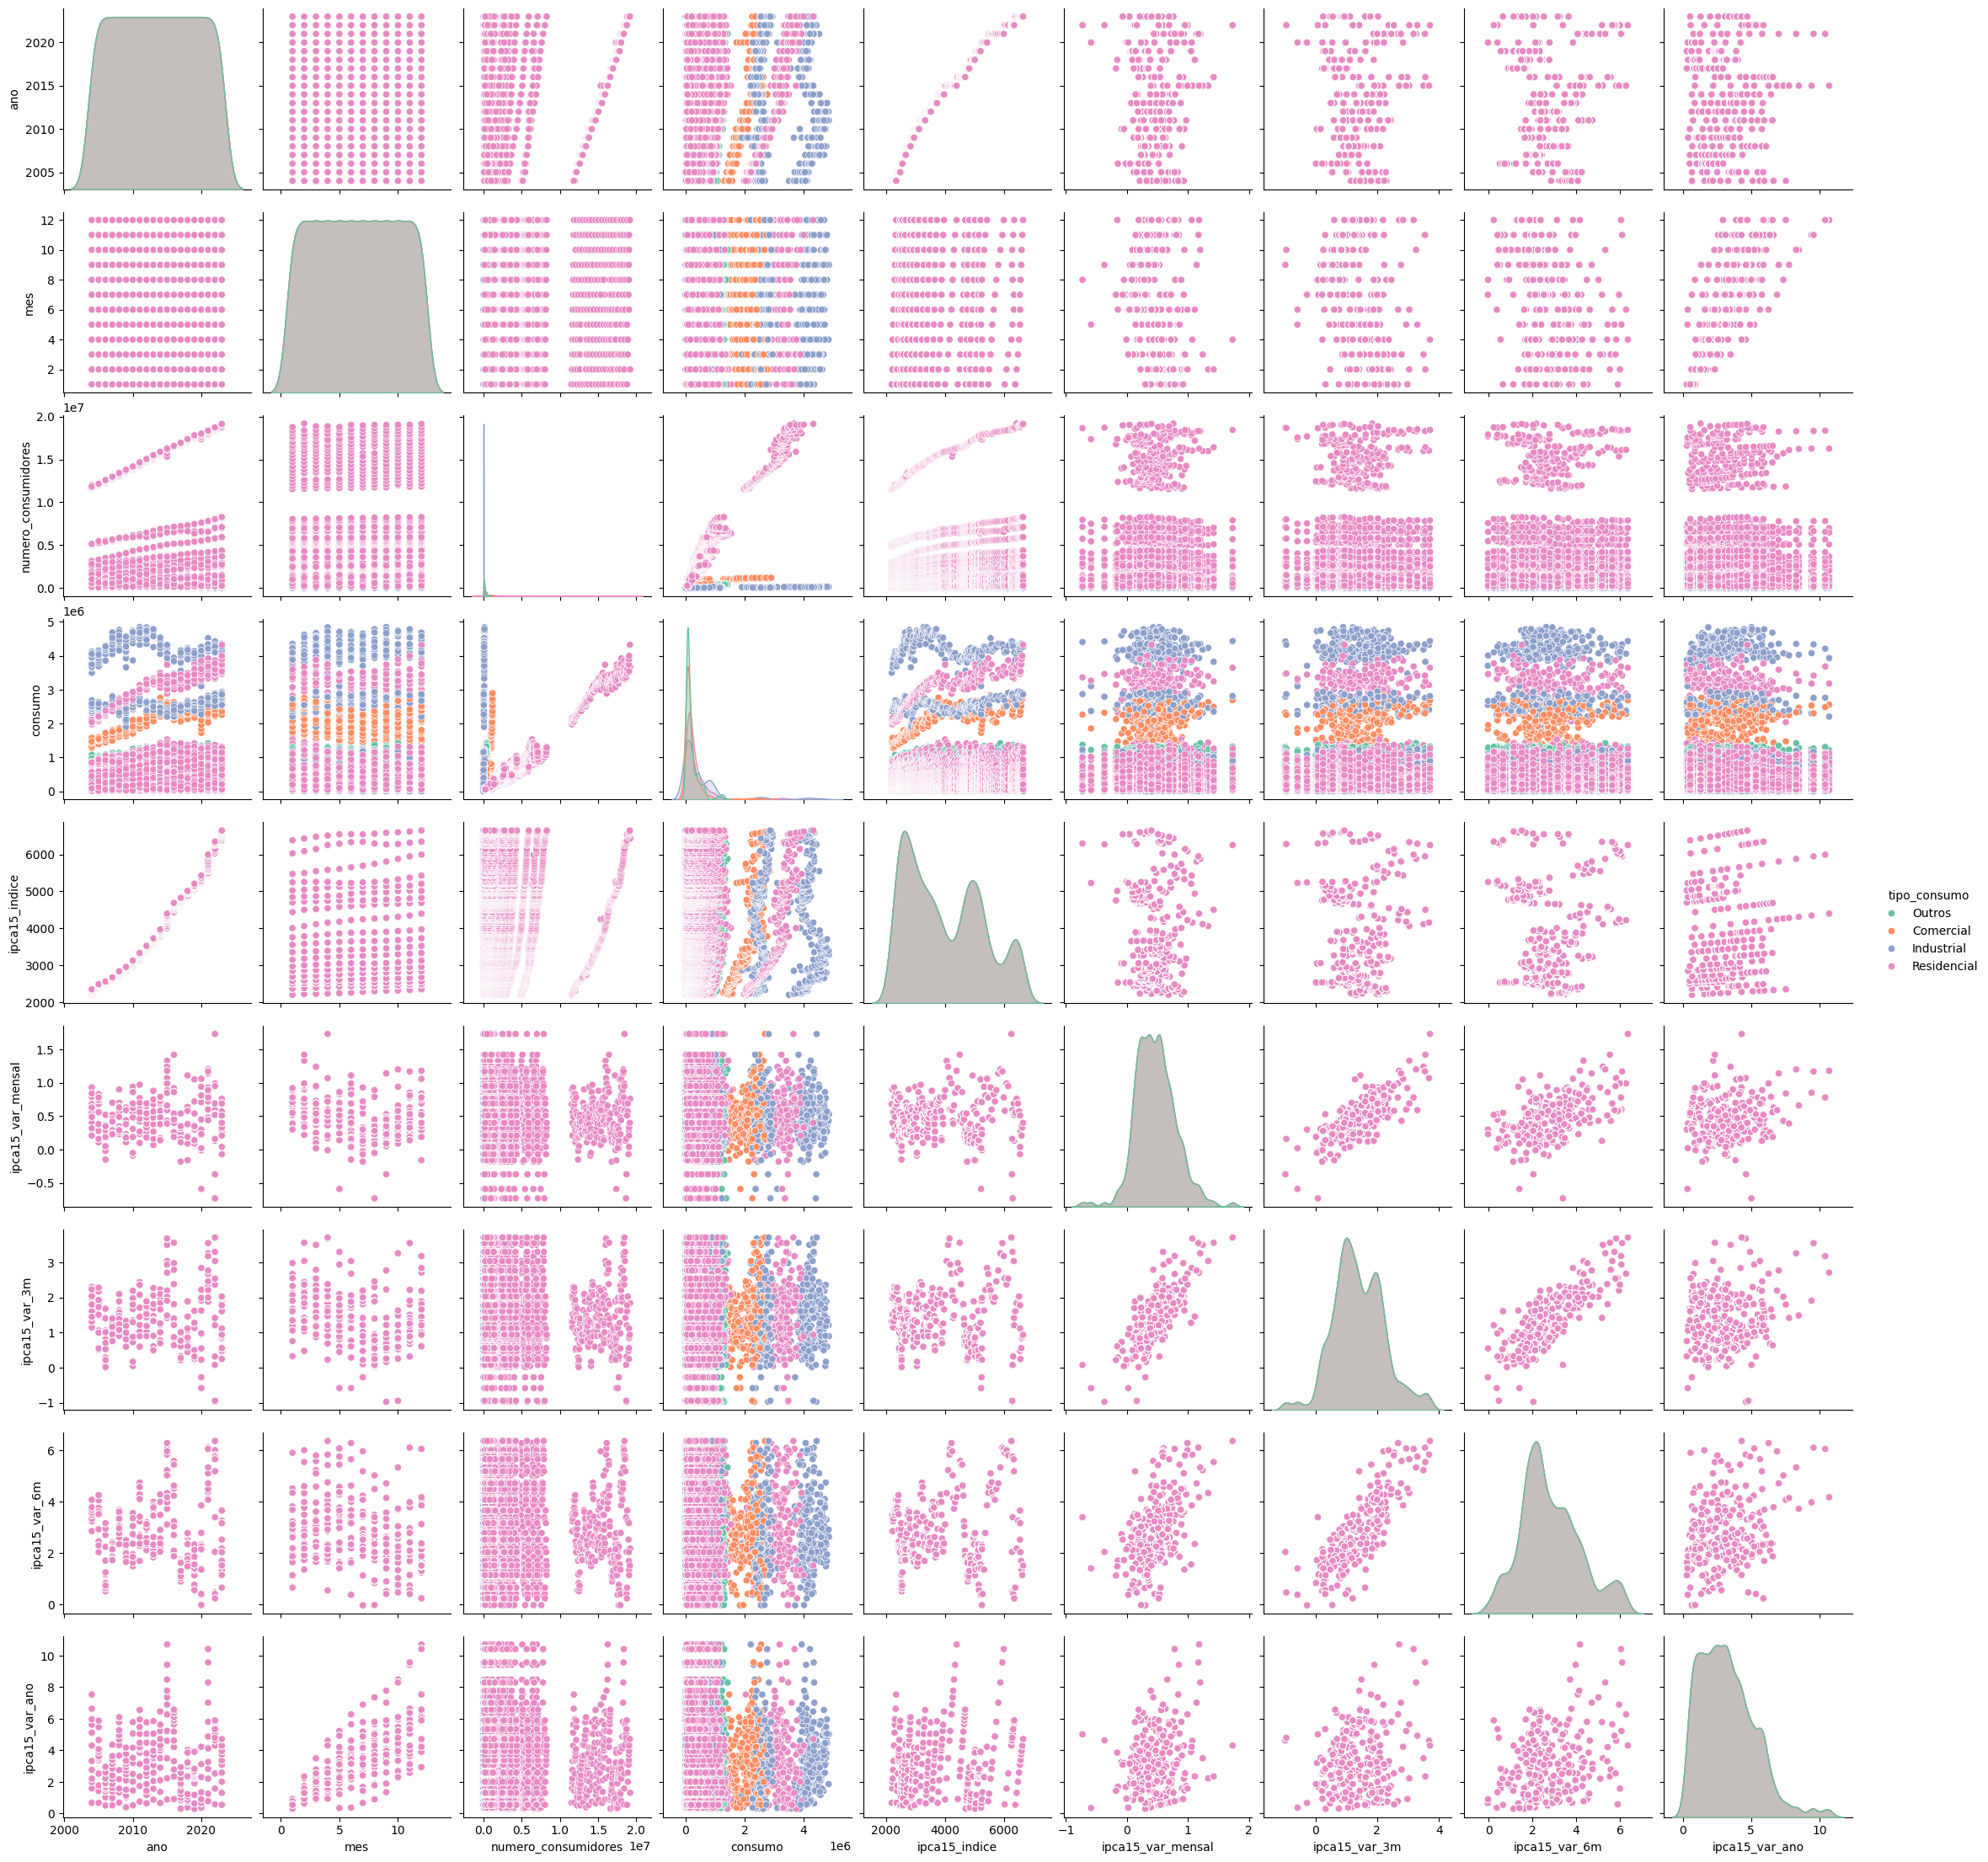

In [54]:
sns.pairplot(df_consolidado, hue="tipo_consumo" )

Relações encontradas:
* Número de consumidores e ano
* Número de consumidores e consumo
* Indice IPCA e Ano
* Variáveis IPCA

Um gráfico de correlação retirando o peso das escalas do gráfico de distribuição, e  mostrando de maneira normalizada a correlação entre as variáveis

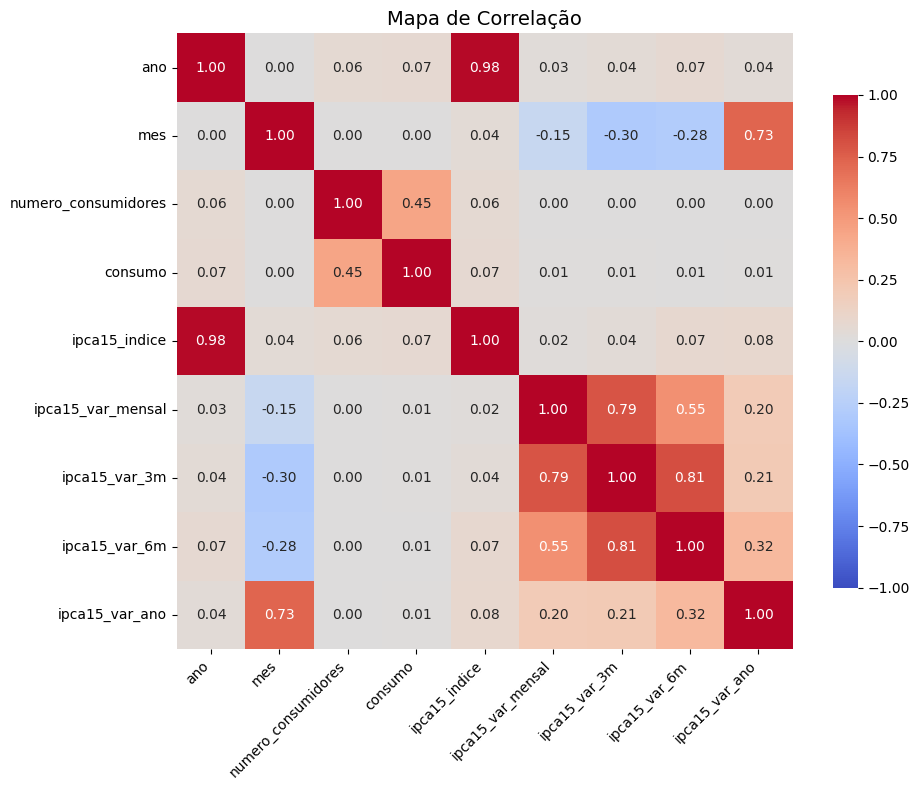

In [55]:
correlacao(df_consolidado)

O que mais chama a atenção aqui é justamente perceber que a inflação não tem influêcia sobre o consumo, invalidando a hipótese criada inicialmente. Entre as variáveis de IPCA era esperado as correlações pois elas são dependentes entre si.    
O ponto de destaque  fica justamente para o consumo e número de consumidores, uma correlação de 0.45 que corroborar para a análise de consumo e consumidores por tipo de consumo.

# Conslusões

* Aparentemente o fator de aumento de consumo de energia é o aumento de número de consumidores da categoria Residencial.   
* O consumo é bem distribuído no Brasil, quando se fala de proporção de consumo x número consumidores por região, entretanto nas análises realizadas percebeu-se que alguns estados são mais ofensores nesse mesmo indicador proporcional, o que abre margem para novos estudos.
* Outro insight extraído foi que existe sazonalidade de consumo que em alguns meses do ano a média de consumo é maior, então se fossemos direcionar ações para mitigar consumo deveriam ser nesses meses.
* A hipótese de correlação entre a inflação e o consumo, neste estudo não se mostrou verdadeira.  